In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels
from sklearn.linear_model import LinearRegression
from pathlib import Path


In [6]:
DATA_FOLDER = '/home/rafachem9/Documents/repos-git/python-for-data-science-and-machine-learning-bootcamp/kaggle/course-time-series/data'
comp_dir = Path(DATA_FOLDER)

holidays_events = pd.read_csv(
    comp_dir / "holidays_events.csv",
    dtype={
        'type': 'category',
        'locale': 'category',
        'locale_name': 'category',
        'description': 'category',
        'transferred': 'bool',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
holidays_events = holidays_events.set_index('date').to_period('D')

store_sales = pd.read_csv(
    comp_dir / 'train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()
average_sales = (
    store_sales
    .groupby('date').mean()
    .squeeze()
    .loc['2017']
)

/tmp/ipykernel_32028/2959771561.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  holidays_events = pd.read_csv(
/tmp/ipykernel_32028/2959771561.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  store_sales = pd.read_csv(


In [9]:
store_sales

sales
store_nbr family     date                 
1         AUTOMOTIVE 2013-01-01   0.000000
                     2013-01-02   2.000000
                     2013-01-03   3.000000
                     2013-01-04   3.000000
                     2013-01-05   5.000000
...                                    ...
9         SEAFOOD    2017-08-11  23.830999
                     2017-08-12  16.859001
                     2017-08-13  20.000000
                     2017-08-14  17.000000
                     2017-08-15  16.000000

[3000888 rows x 1 columns]

In [16]:
X = average_sales.to_frame()
X["week"] = X.index.week
X["day"] = X.index.dayofweek
X

,sales,week,day
date,,,
2017-01-01,6.780303,52,6
2017-01-02,786.928406,1,0
2017-01-03,619.740234,1,1
2017-01-04,555.607971,1,2
2017-01-05,436.375397,1,3
...,...,...,...
2017-08-11,463.733856,32,4
2017-08-12,444.798309,32,5
2017-08-13,485.768616,32,6


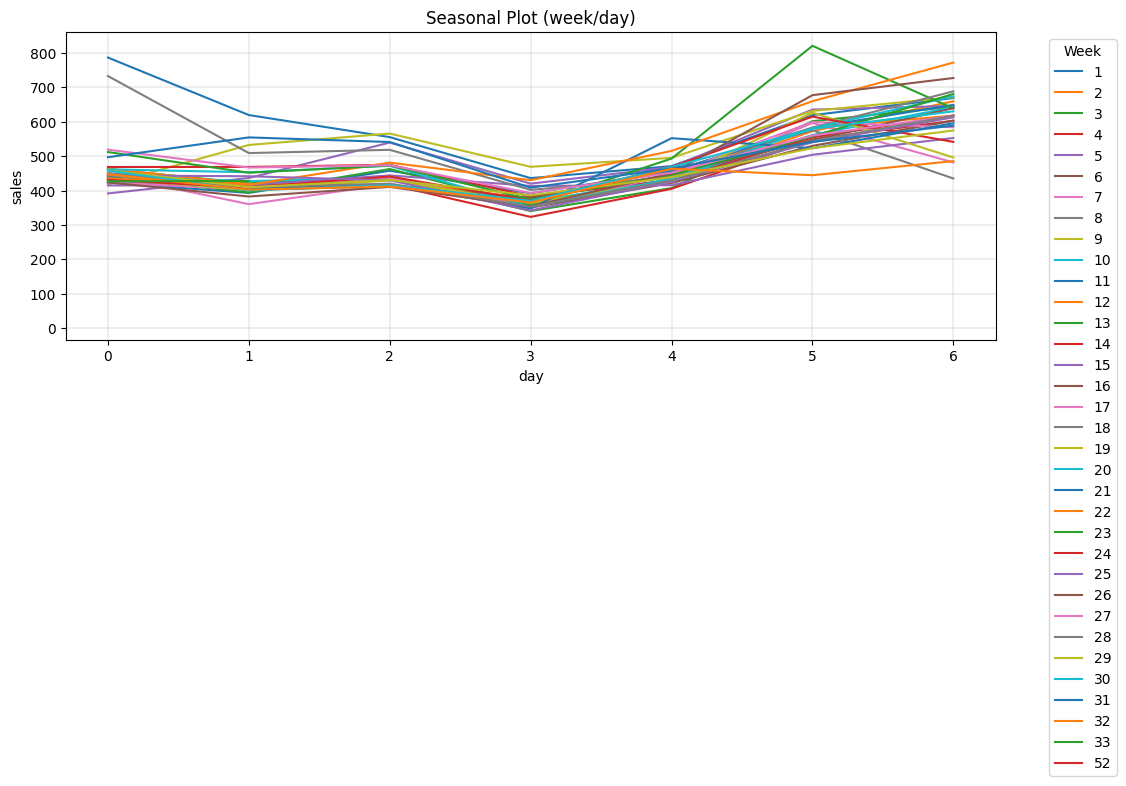

In [23]:
# Crear el gráfico estacional (semana/día) usando seaborn
plt.figure(figsize=(12, 4))
sns.lineplot(data=X, x='day', y='sales', hue='week', palette='tab10')
plt.title('Seasonal Plot (week/day)')
plt.xlabel('day')
plt.ylabel('sales')
plt.legend(title='Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='major', linestyle='-', linewidth=0.3, axis='both')  # Añadir una cuadrícula suave

plt.show()

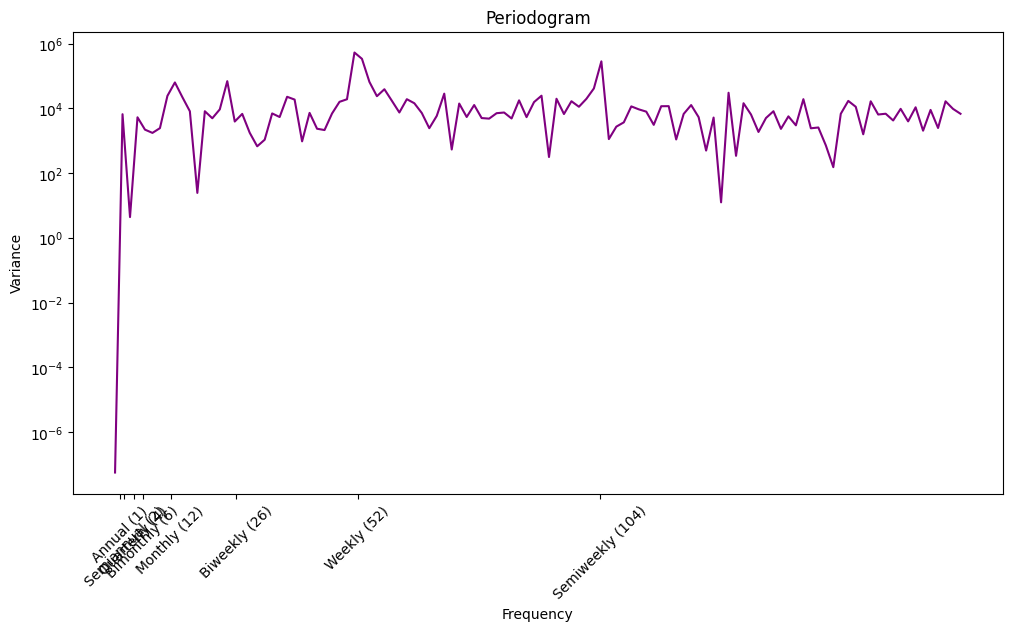

In [27]:
from scipy.signal import periodogram
# Calcular el periodograma
frequencies, spectrum = periodogram(X['sales'])

# Crear el gráfico del periodograma
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum, color='purple')
plt.title('Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Variance')

# Ajustar las etiquetas del eje x para mostrar las frecuencias relevantes
plt.xticks(ticks=[1/365, 1/182.5, 1/91.25, 1/61, 1/30.5, 1/14, 1/7, 1/3.5],
           labels=['Annual (1)', 'Semiannual (2)', 'Quarterly (4)', 'Bimonthly (6)', 
                   'Monthly (12)', 'Biweekly (26)', 'Weekly (52)', 'Semiweekly (104)'],
           rotation=45)
plt.yscale('log')  # Usar escala logarítmica para mejor visualización
plt.show()